## **02. Data Cleaning & QC Verification**
---


This notebook serves as the interactive front-end for our data cleaning and quality control scripts. The workflow is as follows:<br>


    >  Run the main preprocessing pipeline (`00_make_views.py`) to get the initial preprocessed file. 
    >  Run the targeted cleaning script (`01_clean_data.py`) to fix specific errors found during QC. 
    >  Run the QC script** (`run_qc.py`) again on the cleaned file to verify that all issues are resolved. 
    >  Visually inspect the final cleaned data to confirm our logic.

### 2.1 Running the Full Preprocessing & Cleaning Pipeline

In [45]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

First, we run the initial preprocessing script.

In [53]:
!python ../src/make_views.py


REPORT: BEFORE PREPROCESSING

Shape: 9105 rows × 47 cols

Missing Data Summary:
         Missing Count  Missing_Percent
adlp              5641        61.954970
urine             4862        53.399231
glucose           4500        49.423394
bun               4352        47.797913
totmcst           3475        38.165843
alb               3372        37.034596
income            2982        32.751236
adls              2867        31.488193
bili              2601        28.566722
pafi              2325        25.535420
ph                2284        25.085118
prg2m             1649        18.110928
edu               1634        17.946183
prg6m             1633        17.935200
sfdm2             1400        15.376167
totcst             888         9.752883
wblc               212         2.328391
charges            172         1.889072
avtisst             82         0.900604
crea                67         0.735859
race                42         0.461285
dnr                 30         0.329489

Next, we run our targeted cleaning script on the output of the previous step.

In [54]:
!python ../src/clean_data.py

Loaded: /Users/harisreedeth/Desktop/D/personal/ProjectMAIP/data/01_processed/support_preprocessed.csv (9105 rows)
[Pre-QC] counts above thresholds: {'age>100': 5, 'pafi>700': 9, 'alb>6': 4}
Saved cleaned file: /Users/harisreedeth/Desktop/D/personal/ProjectMAIP/data/01_processed/support_preprocessed_clean.csv
Changes summary: {'age_capped': 5, 'pafi_capped': 9, 'alb_set_nan_gt6': 4}
Updated P_view_scaled.csv using existing scaler.


### 2.2 Final QC Verification

Now we run the QC script on the *final, cleaned* data. If our logic in `clean_data.py` was correct, the section on 'Implausible Values' should now be empty.

In [55]:
# Run the text-based QC report. We expect no 'ISSUE' logs for implausible values.\n",
!python ../src/run_qc.py

# note some extreme values of alb are still within plausibility when the study population primarily consists of terminally ill geriatric subjects.

Loaded: /Users/harisreedeth/Desktop/D/personal/ProjectMAIP/data/01_processed/support_preprocessed.csv (9105 rows, 58 cols)
[age] 5 outside plausible range; top 5:
 eid       age
7609 101.84796
3031 100.84900
4461 100.67896
 924 100.24597
2390 100.13098
[age] 56 IQR outliers (not necessarily 'errors'); bounds are data-driven.
[meanbp] 6 IQR outliers (not necessarily 'errors'); bounds are data-driven.
[wblc] 431 IQR outliers (not necessarily 'errors'); bounds are data-driven.
[hrt] 40 IQR outliers (not necessarily 'errors'); bounds are data-driven.
[resp] 313 IQR outliers (not necessarily 'errors'); bounds are data-driven.
[temp] 14 IQR outliers (not necessarily 'errors'); bounds are data-driven.
[pafi] 9 outside plausible range; top 5:
 eid    pafi
6189 890.375
5428 869.375
3550 819.000
7646 795.125
 406 763.250
[pafi] 59 IQR outliers (not necessarily 'errors'); bounds are data-driven.
[alb] 4 outside plausible range; top 4:
 eid       alb
4764 29.000000
8698 10.898438
6322  8.599609
80

In [61]:
!python ../src/run_qc.py --input /Users/harisreedeth/Desktop/D/personal/ProjectMAIP/data/01_processed/support_preprocessed_clean.csv --visualize


Loaded: /Users/harisreedeth/Desktop/D/personal/ProjectMAIP/data/01_processed/support_preprocessed_clean.csv (9105 rows, 58 cols)
[age] 55 IQR outliers (not necessarily 'errors'); bounds are data-driven.
[meanbp] 6 IQR outliers (not necessarily 'errors'); bounds are data-driven.
[wblc] 431 IQR outliers (not necessarily 'errors'); bounds are data-driven.
[hrt] 40 IQR outliers (not necessarily 'errors'); bounds are data-driven.
[resp] 313 IQR outliers (not necessarily 'errors'); bounds are data-driven.
[temp] 14 IQR outliers (not necessarily 'errors'); bounds are data-driven.
[pafi] 59 IQR outliers (not necessarily 'errors'); bounds are data-driven.
[alb] 150 IQR outliers (not necessarily 'errors'); bounds are data-driven.
[bili] 1397 IQR outliers (not necessarily 'errors'); bounds are data-driven.
[crea] 987 IQR outliers (not necessarily 'errors'); bounds are data-driven.
[sod] 256 IQR outliers (not necessarily 'errors'); bounds are data-driven.
[ph] 809 IQR outliers (not necessarily 'er

### 2.3 Visual Confirmation

The final and most important step in a notebook is to visually confirm the results. We'll load the final cleaned data and plot the distribution of a variable we know we changed, like `alb` (albumin), to ensure it looks correct.

--- Final Cleaned Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   eid                         9105 non-null   int64  
 1   age                         9105 non-null   float64
 2   sex                         9105 non-null   float64
 3   num.co                      9105 non-null   float64
 4   edu                         9105 non-null   float64
 5   income                      9105 non-null   float64
 6   scoma                       9105 non-null   float64
 7   avtisst                     9105 non-null   float64
 8   sps                         9105 non-null   float64
 9   aps                         9105 non-null   float64
 10  diabetes                    9105 non-null   float64
 11  dementia                    9105 non-null   float64
 12  ca                          9105 non-null   float64
 13  m

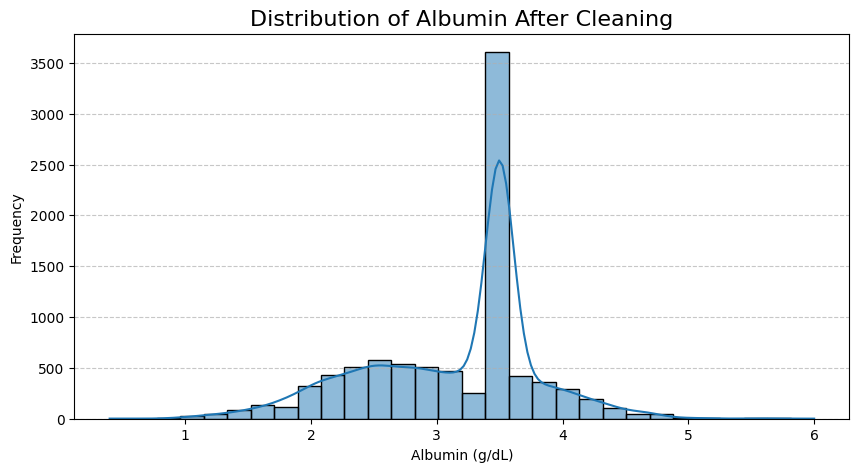

In [62]:
# Load the final, cleaned data
final_df = pd.read_csv('../data/01_processed/support_preprocessed_clean.csv')

print("--- Final Cleaned Data Info ---")
final_df.info()

# Let's check the 'alb' column specifically
print("-- Albumin (alb) Column Statistics After Cleaning ---")
print(final_df['alb'].describe())

# Plot the distribution to visually confirm the removal of impossible values
plt.figure(figsize=(10, 5))
sns.histplot(final_df['alb'], kde=True, bins=30)
plt.title('Distribution of Albumin After Cleaning', fontsize=16)
plt.xlabel('Albumin (g/dL)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [50]:
!python ../src/run_qc.py --visualize

Starting Data Quality Control (QC) Script

Successfully loaded preprocessed data from: /Users/harisreedeth/Desktop/D/personal/ProjectMAIP/data/01_processed/support_preprocessed.csv

--- 1. Checking for Biologically/Logically Implausible Values ---

[ISSUE] Found 2 implausible values in 'totmcst':
      totmcst
7760  -102.72
7780   -28.48

--- 2. Checking for Statistical Outliers (1.5 * IQR Rule) ---

[INFO] Found 54 statistical outliers in 'age' (Bounds: [20.99, 105.80]).
Extreme examples:
         age
1026  20.854
164   20.832
2633  20.821
5201  20.767
1419  20.731

[INFO] Found 6 statistical outliers in 'meanbp' (Bounds: [-3.00, 173.00]).
Extreme examples:
      meanbp
3122   195.0
3729   193.0
5725   187.0
5992   180.0
9089   178.0

[INFO] Found 431 statistical outliers in 'wblc' (Bounds: [-5.15, 27.25]).
Extreme examples:
          wblc
7524  200.0000
5406  128.7812
2909  117.0000
7354  113.5938
1331  112.1875

[INFO] Found 40 statistical outliers in 'hrt' (Bounds: [0.00, 192.00]).